In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
!pip install statsmodels 

You should consider upgrading via the 'c:\users\administrator\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [4]:
data_train = pd.read_csv('data/train.csv')
col_names = ['cycle','setting1','setting2','setting3','s1','s2', 's3', 's4','s5', 's6',  's7', 's8', 's9', 
           's10',  's11', 's12', 's13', 's14', 's15',  's16', 's17', 's18', 's19',  's20', 's21','ttf']


<AxesSubplot:>

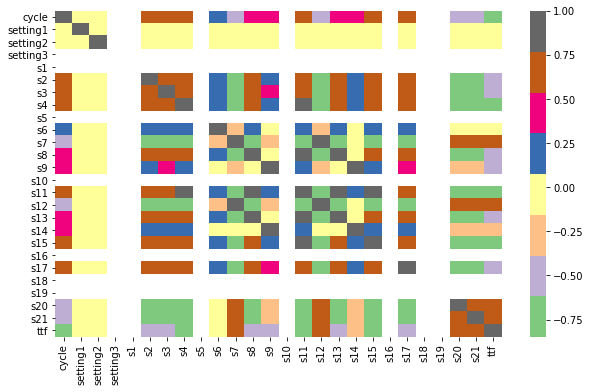

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(data_train[col_names].corr(),cmap= 'Accent')

## detect multicollinearity

In [97]:
col_names2 = ['cycle','setting1','setting2','setting3','s1','s2', 's3', 's4','s5', 's6',  's7', 's8', 's9', 
           's10',  's11', 's12', 's13', 's14', 's15',  's16', 's17', 's18', 's19',  's20', 's21','ttf']


In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores
df1= data_train[col_names2].iloc[:,:-1]
vif_scores(df1)

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Independent Features,VIF Scores
0,cycle,2.101638e+00
1,setting1,1.001915e+00
2,setting2,1.001098e+00
3,setting3,0.000000e+00
4,s1,0.000000e+00
5,s2,2.640391e+00
6,s3,2.292816e+00
7,s4,4.601251e+00
8,s5,1.380318e-07
9,s6,1.031189e+00


## model

In [94]:
col_name2 = ['cycle','s2', 's3', 's4',  's7', 's8', 
          's11', 's12', 's13','s14', 's15',  's16', 's17',  's20', 's21']

In [99]:
from sklearn.model_selection import train_test_split
X = data_train[col_name2]
y = data_train['ttf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


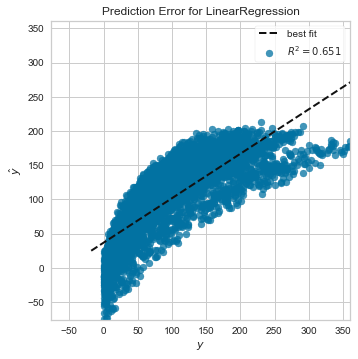

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [100]:
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import PredictionError
model = LinearRegression() # Instantiate the linear model and visualizer
visualizer = PredictionError(model=model, identity=False)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()   